In [327]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [328]:
file = ('C:\\Users\\mjjyo\\OneDrive\\Desktop\\openavenuesmicrointernship\\open_ave_data.csv')
file = pd.read_csv(file)

In [329]:
file

,Unnamed: 0,ReportText,findings,clinicaldata,ExamName,impression
0,0,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Cough. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,IMPRESSION: Normal 2-view chest radiography.
1,1,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,IMPRESSION: No acute cardiopulmonary abnormali...
2,2,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,IMPRESSION: No acute cardiopulmonary process.
3,3,Exam: - CHEST-PORTABLE History: Chest pain Com...,Findings: Heart size appears normal. Lungs cle...,History: Chest pain \n\n,Exam: - CHEST-PORTABLE\n\nComparison: None,Impression: Lungs clear
4,4,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,"CLINICAL HISTORY: CHEST PAIN, SHORTNESS OF BRE...",EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,IMPRESSION: Normal single view chest.
...,...,...,...,...,...,...
949,982,CHEST RADIOGRAPH: PA and Lateral views HISTORY...,LUNGS: The lung fields demonstrate normal degr...,HISTORY: R05 Cough \n\n,CHEST RADIOGRAPH: PA and Lateral views\n\nCOMP...,IMPRESSION: No acute pulmonary disease.
950,983,EXAM DESCRIPTION: X-ray single view chest. CLI...,FINDINGS: The lungs are well expanded and are ...,"CLINICAL HISTORY: 68 years Male, SOB \n\n",EXAM DESCRIPTION: X-ray single view chest.\n\n...,IMPRESSION: No evidence of acute intrathoracic...
951,984,EXAM: CHEST RADIOGRAPHY EXAM DATE: 04/02/2018 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Chest pain. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 04/02/2018 ...,IMPRESSION: Normal single view chest.
952,985,EXAM: XR CHEST 1 VW HISTORY: chest pain TECHNI...,FINDINGS: Lines and tubes: None Cardiomediasti...,HISTORY: chest pain \n\n,EXAM: XR CHEST 1 VW\n\nTECHNIQUE: Chest AP vie...,IMPRESSION: No acute cardiopulmonary process D...


In [347]:
#files to do idf on
exam_names = file['ExamName']
impressions= file['impression']
findings = file['findings']
report_text = file['ReportText']
# files = [exam_names, impressions, findings]
files = {'ExamName': exam_names, 'impression':impressions, 'findings': findings, 'ReportText': report_text}


# def color_func(name):
#     if name == 'ExamName':
#         return 'red'
#     elif name == 'impression':
#         return 'yellow'
#     elif name == 'findings':
#         return 'green'
#     elif name == 'ReportText':
#         return 'blue'

In [331]:
exam_names

0      EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...
1      EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...
2      EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...
3             Exam: - CHEST-PORTABLE\n\nComparison: None
4      EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...
                             ...                        
949    CHEST RADIOGRAPH: PA and Lateral views\n\nCOMP...
950    EXAM DESCRIPTION: X-ray single view chest.\n\n...
951    EXAM: CHEST RADIOGRAPHY EXAM DATE: 04/02/2018 ...
952    EXAM: XR CHEST 1 VW\n\nTECHNIQUE: Chest AP vie...
953    Exam: XR CHEST AP OR PA ONLY\n\nTECHNIQUE: Sin...
Name: ExamName, Length: 954, dtype: object

In [332]:
#getting idf of documents
def get_idf(corpus):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(corpus)
    vectorizer.get_feature_names_out()
    return X
    
#dictionary of corpuses
corpuses = {}

for i in files.items():
    computed = get_idf(i[1])
    corpuses[i[0]] = computed

In [333]:
#ensuring it all got into corpuses correctly
for i in corpuses.items():
    print(i[0])
    print(i[1].shape)

ExamName
(954, 238)
impression
(954, 513)
findings
(954, 628)
ReportText
(954, 1083)


In [334]:
#Num of files, num of distinct words in each

In [335]:
for i in corpuses.items():
    print(i[0])
    print(i[1].toarray())

ExamName
[[0.         0.36659228 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.1339425  0.         0.        ]
 [0.         0.         0.         ... 0.10165379 0.         0.        ]
 ...
 [0.         0.         0.33022006 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.31351985 0.         0.        ]
 [0.         0.         0.         ... 0.14375766 0.         0.34164285]]
impression
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
findings
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
ReportText
[[0.         0.22586591 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.      

In [336]:
import numpy as np

In [337]:
from sklearn.manifold import TSNE

In [338]:
import matplotlib.pyplot as plt

In [339]:
embeddeds = {}

In [340]:
#apply TSNE on each item in corpus
def add_embedded(item):
    X_embedded = TSNE(n_components = 2, learning_rate='auto', init='random', perplexity=3).fit_transform(item)
    return X_embedded
    
for i in corpuses.items():
    embedded = add_embedded(i[1])
    embeddeds[i[0]] = embedded

In [348]:
plot_list = {}
colors = ['blue', 'red', 'green', 'yellow']
for i in embeddeds.items():
    name = i[0]
    item = i[1]
    tup = (item[0], item[1])
    plot_list[name] = tup
plot_list

{'ExamName': (array([ 13.423668, -40.250584], dtype=float32),
  array([-63.93479 ,  -8.451887], dtype=float32)),
 'impression': (array([ 42.34171, -38.06869], dtype=float32),
  array([-4.3528204, 61.354626 ], dtype=float32)),
 'findings': (array([-25.79016 ,  30.807762], dtype=float32),
  array([100.78291 , -23.274984], dtype=float32)),
 'ReportText': (array([55.66127  , -5.9505434], dtype=float32),
  array([25.401548, 12.299471], dtype=float32))}

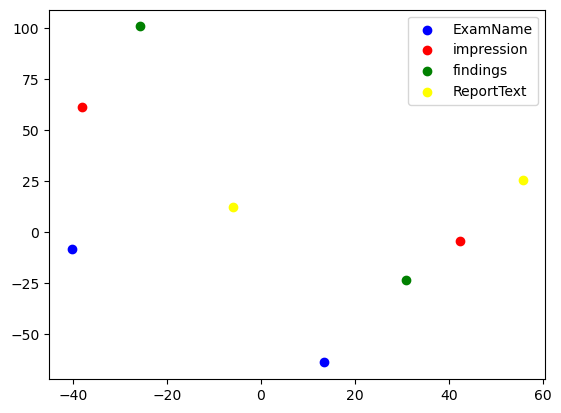

In [349]:
num = 0
for i in plot_list.items():
    name = i[0]
    embedded_item = i[1]
    plt.scatter(embedded_item[0], embedded_item[1], c=colors[num], label = name)
    num+= 1
plt.legend()

In [357]:



all_coords = []
for i in embeddeds.items():
    name = i[0]
    item = i[1]
    for i in item:
        tup = (name, i)
        all_coords.append(tup)


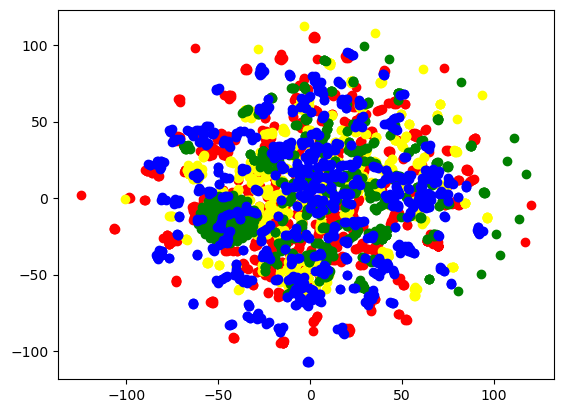

In [356]:
for i in all_coords:
    name = i[0]
    embedded_item = i[1]
    plt.scatter(embedded_item[0], embedded_item[1], c=color_func(name))
    